In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import os

## Text Summarization Metrics Diagrams

In [6]:
csv_dir = "./results"
all_files = [os.path.join(csv_dir, f) for f in os.listdir(csv_dir)]

# Combine all files into a single DataFrame
df_all = pd.concat([pd.read_csv(f) for f in all_files], ignore_index=True)

# Get available subjects
subjects = df_all['Subject'].unique().tolist()

# Dropdown to choose subject
dropdown = widgets.Dropdown(
    options=subjects,
    description='Subject:',
    value=subjects[0],
    layout=widgets.Layout(width='50%')
)

In [ ]:
def plot_text_summ_metrics(subject):
    df = df_all[df_all['Subject'] == subject].copy()

    # Average ROUGE values
    df['ROUGE_Precision_avg'] = df[['ROUGE-1 Precision', 'ROUGE-2 Precision', 'ROUGE-L Precision']].mean(axis=1)
    df['ROUGE_Recall_avg'] = df[['ROUGE-1 Recall', 'ROUGE-2 Recall', 'ROUGE-L Recall']].mean(axis=1)
    df['ROUGE_F1_avg'] = df[['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1']].mean(axis=1)

    # Select relevant columns
    df_plot = df[['Model', 'BLEU', 'METEOR', 'ROUGE_Precision_avg', 'ROUGE_Recall_avg', 'ROUGE_F1_avg']]
    df_melted = pd.melt(df_plot, id_vars='Model', var_name='Metric', value_name='Score')

    # Plot
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Model Comparison on Subject: "{subject}"')
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

In [ ]:
widgets.interact(plot_text_summ_metrics, subject=dropdown)

interactive(children=(Dropdown(description='Subject:', layout=Layout(width='50%'), options=('football', 'IT', …

<function __main__.plot_for_subject(subject)>

In [ ]:
def plot_text_summ_metrics_averages():
    # Calculate average values for all subjects and models
    df_avg = df_all.copy()
    
    # Average ROUGE values for all models
    df_avg['ROUGE_Precision_avg'] = df_avg[['ROUGE-1 Precision', 'ROUGE-2 Precision', 'ROUGE-L Precision']].mean(axis=1)
    df_avg['ROUGE_Recall_avg'] = df_avg[['ROUGE-1 Recall', 'ROUGE-2 Recall', 'ROUGE-L Recall']].mean(axis=1)
    df_avg['ROUGE_F1_avg'] = df_avg[['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1']].mean(axis=1)

    # Group by Model and calculate mean per model
    df_avg_grouped = df_avg.groupby('Model')[['BLEU', 'METEOR', 'ROUGE_Precision_avg', 'ROUGE_Recall_avg', 'ROUGE_F1_avg']].mean().reset_index()

    # Plot overall average metrics
    df_melted_avg = pd.melt(df_avg_grouped, id_vars='Model', var_name='Metric', value_name='Average Score')
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_melted_avg, x='Metric', y='Average Score', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Average Model Performance Across All Subjects')
    plt.xlabel('Metrics')
    plt.ylabel('Average Scores')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

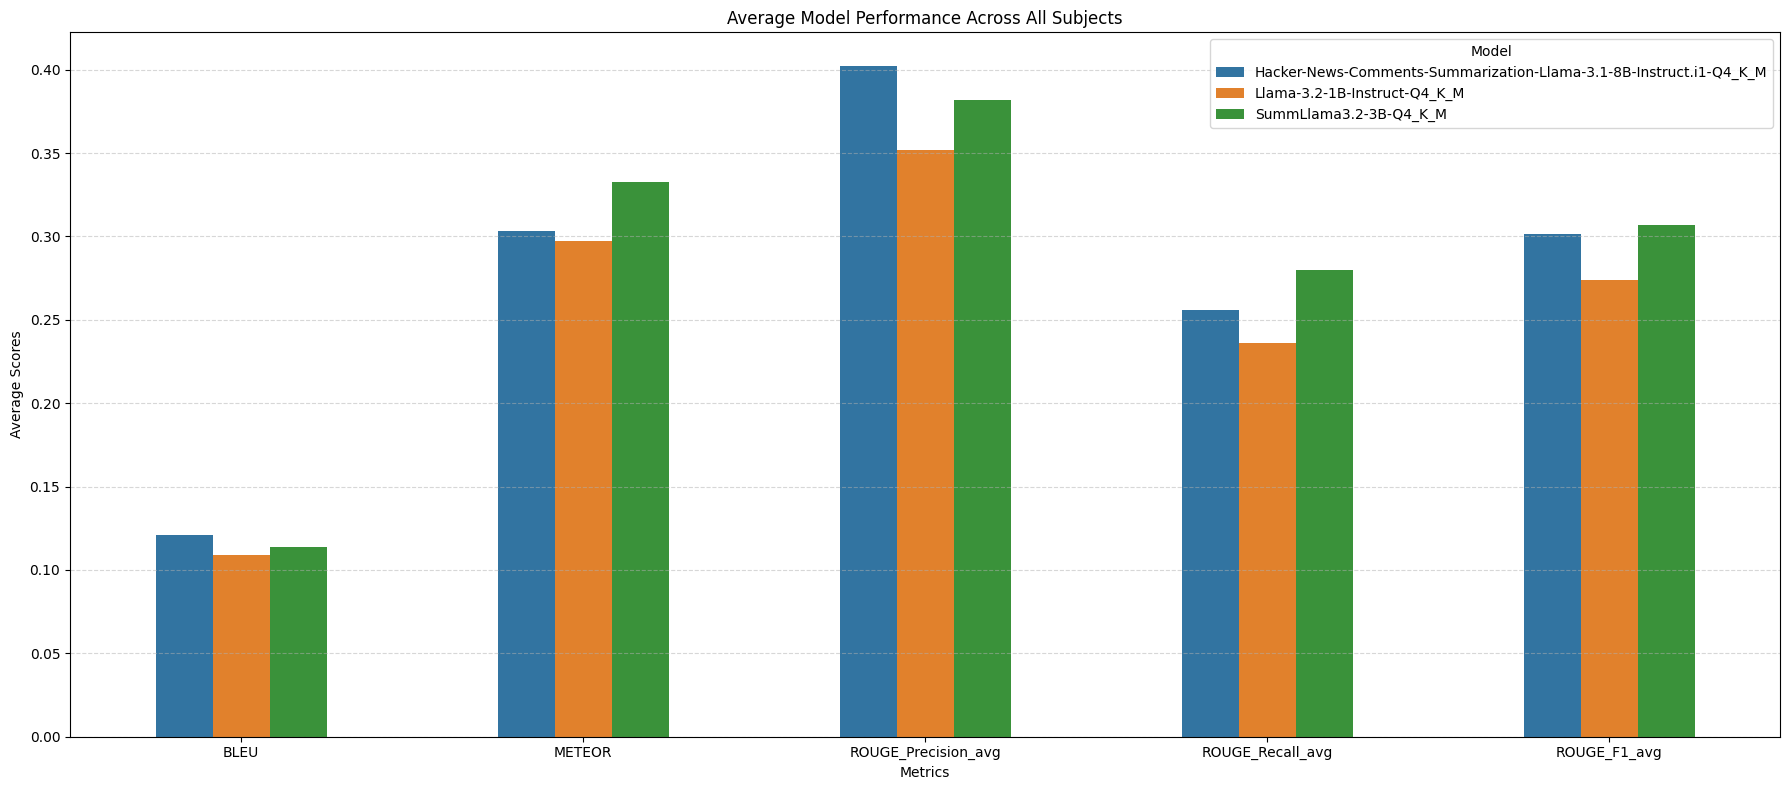

In [ ]:
plot_text_summ_metrics_averages()

## Model Performance Metrics Diagrams

In [14]:
csv_dir_performance = "./outputs"
all_performance_files = [os.path.join(csv_dir_performance, f) for f in os.listdir(csv_dir_performance) if f.endswith(".csv")]

# Combine all performance files into a single DataFrame
df_all_performance = pd.concat([pd.read_csv(f) for f in all_performance_files], ignore_index=True)

In [15]:
def plot_performance_metrics(subject):
    df = df_all_performance[df_all_performance['Subject'] == subject].copy()
    
    # Melt the dataframe to long format for plotting (excluding Memory Usage)
    df_melted = pd.melt(df, id_vars=['Model', 'Subject'], value_vars=['Generation Time (seconds)', 'CPU Usage (%)', 'Token Count'],
                        var_name='Metric', value_name='Value')

    # Plot the performance metrics (excluding Memory Usage)
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_melted, x='Metric', y='Value', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Model Performance Metrics (excluding Memory Usage) for "{subject}"')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

    # Now plot Memory Usage on a separate diagram
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df, x='Model', y='Memory Usage (MB)', palette='tab10', width=0.2)
    plt.title(f'Memory Usage for "{subject}"')
    plt.xlabel('Model')
    plt.ylabel('Memory Usage (MB)')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
widgets.interact(plot_performance_metrics, subject=dropdown)

interactive(children=(Dropdown(description='Subject:', index=3, layout=Layout(width='50%'), options=('football…

<function __main__.plot_performance_metrics(subject)>

In [17]:
def plot_average_performance_metrics():
    # Calculate the average values for all models across all subjects
    df_avg = df_all_performance.groupby(['Model'])[['Generation Time (seconds)', 'CPU Usage (%)', 'Token Count', 'Memory Usage (MB)']].mean().reset_index()

    # Melt the dataframe to long format for the summary plot (excluding Memory Usage)
    df_avg_melted = pd.melt(df_avg, id_vars=['Model'], value_vars=['Generation Time (seconds)', 'CPU Usage (%)', 'Token Count'],
                            var_name='Metric', value_name='Average Value')

    # Plot the summary metrics (average values) for all metrics except Memory Usage
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_avg_melted, x='Metric', y='Average Value', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Average Model Performance Metrics (excluding Memory Usage)')
    plt.xlabel('Metrics')
    plt.ylabel('Average Values')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

    # Plot Memory Usage on a separate diagram (average memory usage)
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_avg, x='Model', y='Memory Usage (MB)', palette='tab10', width=0.2)
    plt.title(f'Average Memory Usage for Models')
    plt.xlabel('Model')
    plt.ylabel('Average Memory Usage (MB)')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


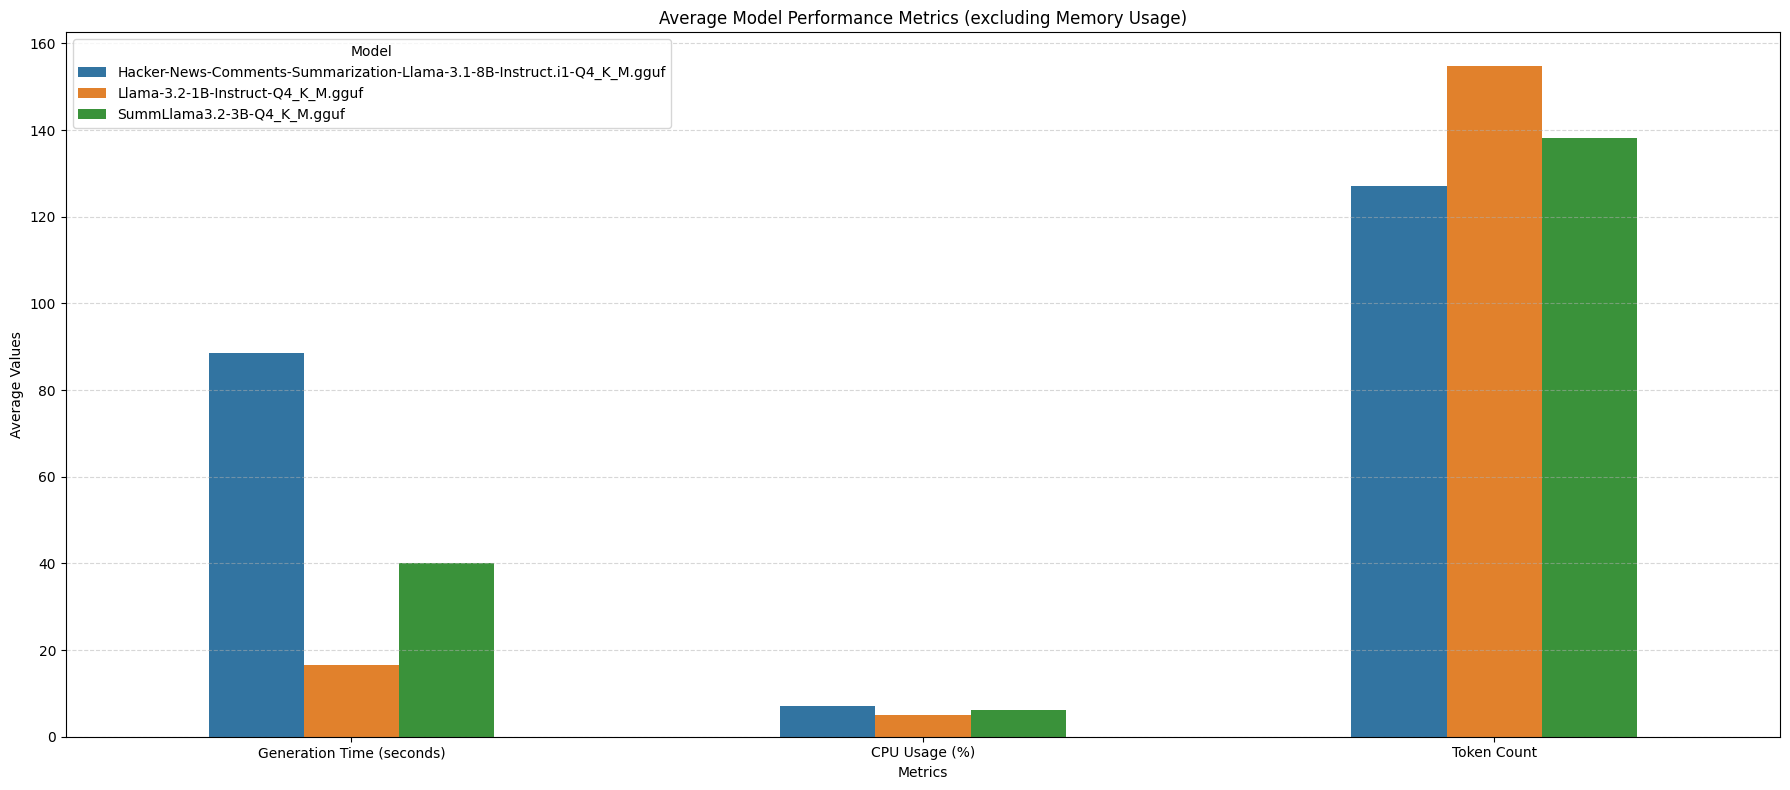

C:\Users\USER\AppData\Local\Temp\ipykernel_21936\1551005135.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_avg, x='Model', y='Memory Usage (MB)', palette='tab10', width=0.2)


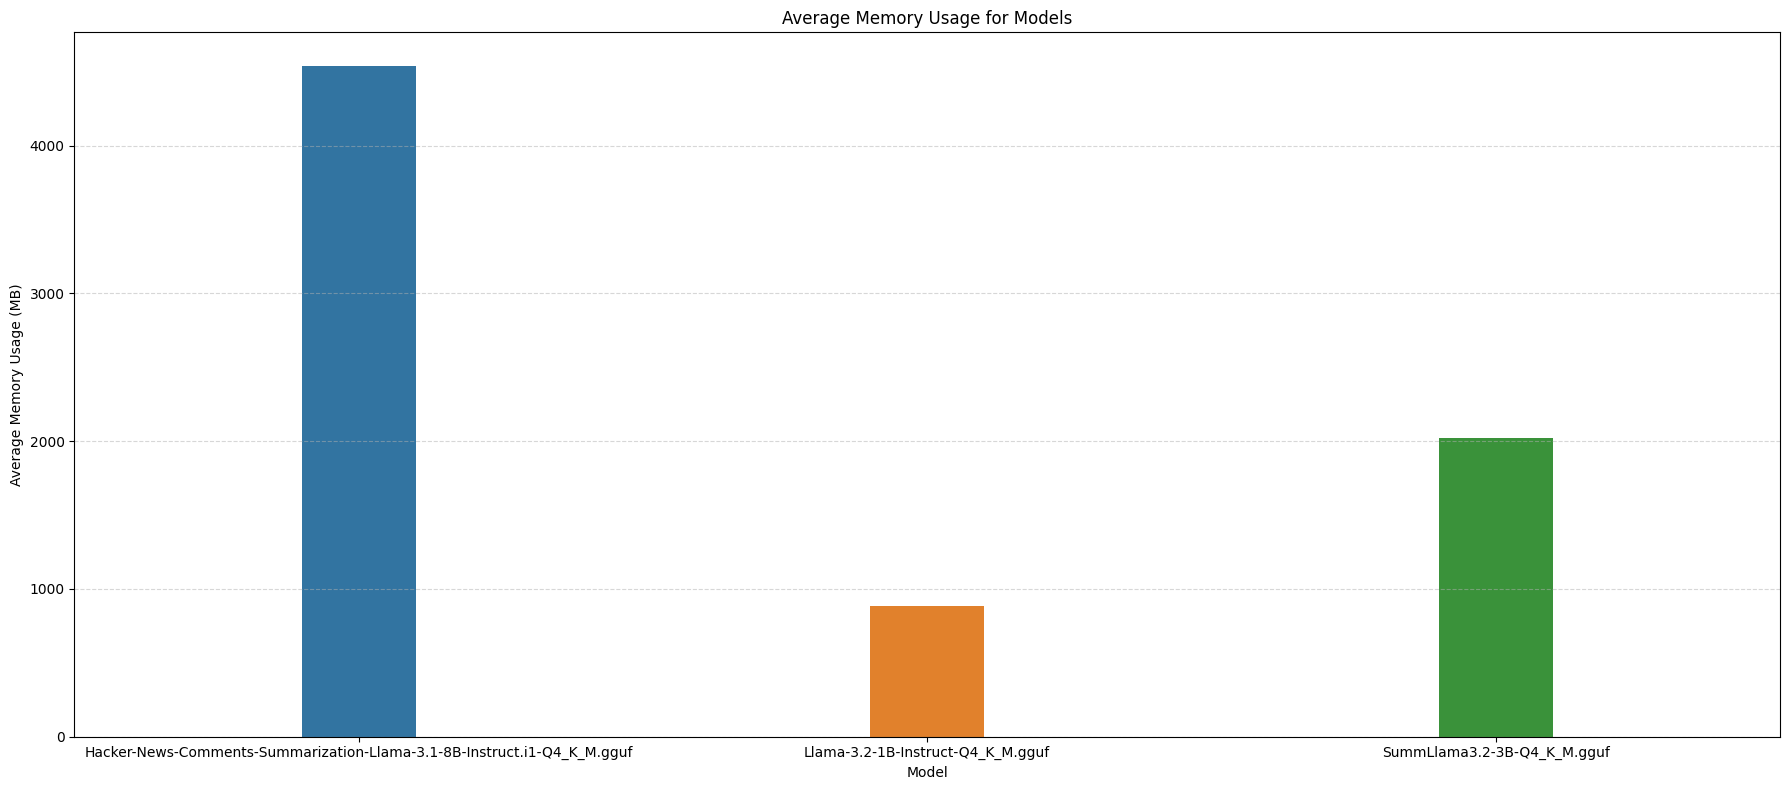

In [18]:
plot_average_performance_metrics()

## Model G-EVAL Metric Diagrams

In [19]:
csv_dir_g_eval = "./results"
all_g_eval_files = [os.path.join(csv_dir_g_eval, f) for f in os.listdir(csv_dir_g_eval) if f.endswith(".csv")]

# Combine all performance files into a single DataFrame
df_all_g_eval = pd.concat([pd.read_csv(f) for f in all_g_eval_files], ignore_index=True)

In [25]:
def plot_g_eval_metrics(subject):
    df = df_all_g_eval[df_all_g_eval['Subject'] == subject].copy()

    # Select relevant columns
    df_plot = df[['Model', 'Accuracy', 'Coherence', 'Concision']]
    df_melted = pd.melt(df_plot, id_vars='Model', var_name='Metric', value_name='Score')

    # Plot
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Model Comparison on Subject: "{subject}"')
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

In [26]:
widgets.interact(plot_g_eval_metrics, subject=dropdown)

interactive(children=(Dropdown(description='Subject:', index=3, layout=Layout(width='50%'), options=('football…

<function __main__.plot_g_eval_metrics(subject)>

In [27]:
def plot_average_g_eval_metric():
    # Calculate the average values for all models across all subjects
    df_avg = df_all_g_eval.groupby(['Model'])[['Accuracy', 'Coherence', 'Concision']].mean().reset_index()

    # Melt the dataframe to long format for the summary plot (excluding Memory Usage)
    df_avg_melted = pd.melt(df_avg, id_vars=['Model'], value_vars=['Accuracy', 'Coherence', 'Concision'],
                            var_name='Metric', value_name='Average Value')

    # Plot the summary metrics (average values) for all metrics except Memory Usage
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_avg_melted, x='Metric', y='Average Value', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Average Model G-EVAL Metric')
    plt.xlabel('Metric')
    plt.ylabel('Average Values')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

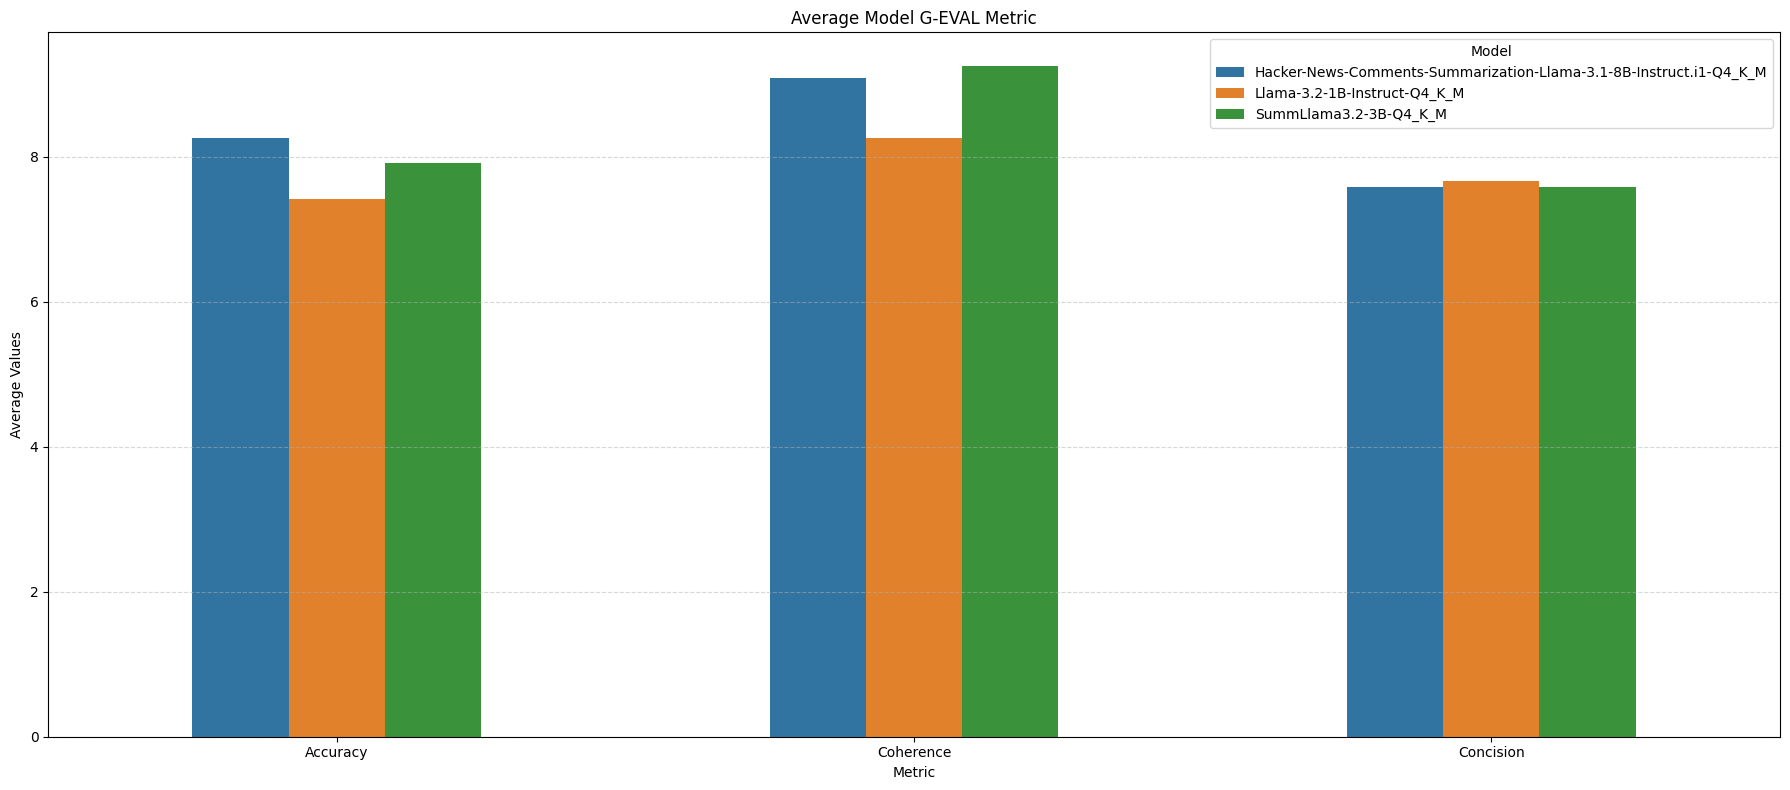

In [28]:
plot_average_g_eval_metric()